<a href="https://colab.research.google.com/github/zahramoradi1998m/liquidity-risk-prediction-deep-learning/blob/main/preprocess_sale_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [105]:
# Load dataset
dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/mar/liquidity-risk-prediction-deep-learning/Sodur.xlsx',usecols=[0,3])
dataset.head()

,TotalGhestAmount,BeginDateKey
0,4857860,13950925
1,4857860,13950925
2,4504880,13950925
3,4504880,13950925
4,-4504880,13950925


In [106]:
# Sort the dataset by BeginDateKey and sum values for each date
dataset=dataset.sort_values(by=['BeginDateKey'])
dataset=dataset.groupby(['BeginDateKey']).sum()

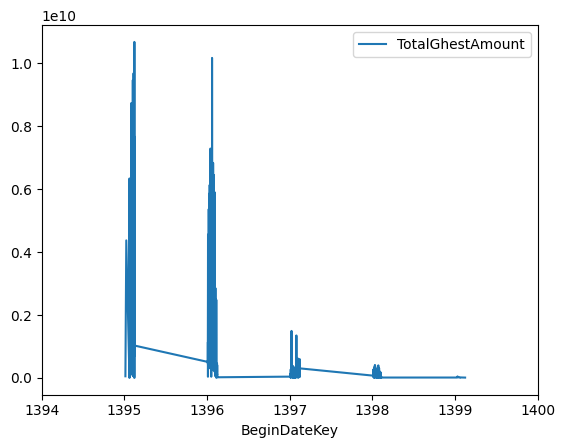

In [107]:
# Display dataset plot
dataset.plot()
xticks = plt.xticks()[0]
plt.xticks(xticks, [str(x)[:4] for x in xticks])
plt.show()


In [108]:
dataset.head()

,TotalGhestAmount
BeginDateKey,
13950123,51799947
13950230,4373474480
13950609,36921608
13950610,1452409257
13950611,466078560


In [109]:
# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
dataset1 = scaler.fit_transform(dataset)

# **Select best time step**

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  29  30  31  34  36  37  38  39  40  41
  42  43  46  47  49  51  52  53  54  56  57  58  59  60  61  62  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  80  81  82  85  86
  87  88  89  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 157 159 160 161 162 163 164 165
 166 167 168 170 171 172 173 174 175 176 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204
 205 206 207 208 209 210 212 213 214 215 216 217 218 220 221 223 224 225
 226 227 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243 244
 245 246 247 249 250 251 252 253 254 255 256 257 258 259 260 

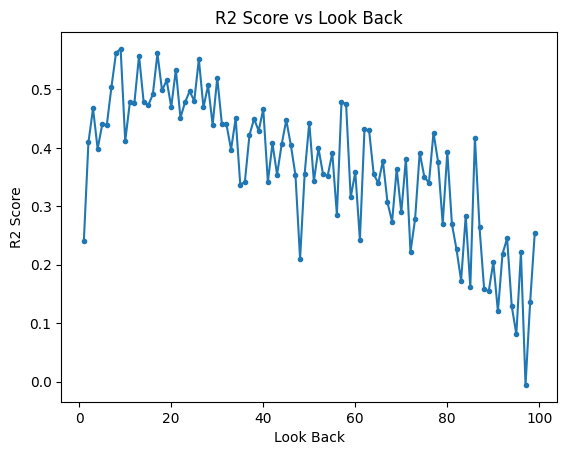

In [121]:
# Function to create a time series dataset
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

# Training and evaluating the model for different look_back values
time_step=[]
look_backs=range(1,100)
for i in look_backs:
  look_back =i
  X, Y = create_dataset(dataset1, look_back)
  XX, testX, YY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  i = 0
  for train_index, test_index in cv.split(XX):
    print("loop:", i)
    if i == 6:
      print( "TRAIN:", train_index, "TEST:", test_index)
      break
    else:
      i+=1

  trainX = XX[train_index]
  trainY = YY[train_index]
  trainY=trainY.reshape(-1,1)

  validX = XX[test_index]
  validY = YY[test_index]
  validY=validY.reshape(-1,1)

  # Train the model
  f=LinearRegression()
  f.fit(trainX, trainY)

  # Predict and evaluate
  ols_testPredicted=f.predict(testX)
  ols_testR2 = r2_score(testY, ols_testPredicted)
  time_step.append(ols_testR2)

# Plotting the results
plt.plot(look_backs, time_step, marker='.')
plt.xlabel('Look Back')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Look Back')
plt.show()

# **create a time series dataset**

In [111]:
look_back =time_step.index(max(time_step))+1
X, Y = create_dataset(dataset1, look_back)
XX, testX_sale, YY, testY_sale = train_test_split(X, Y, test_size=0.3, random_state=42)

#kfold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
i = 0
for train_index, test_index in cv.split(XX):
  print("loop:", i)
  if i == 6:
    print( "TRAIN:", train_index, "TEST:", test_index)
    break
  else:
    i+=1

trainX_sale = XX[train_index]
trainY_sale = YY[train_index]
trainY_sale=trainY_sale.reshape(-1,1)

validX_sale = XX[test_index]
validY_sale = YY[test_index]
validY_sale=validY.reshape(-1,1)

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  25  26  27  29  30  31  34  36  37  38  39  40  41  42
  43  46  47  49  51  52  53  54  56  57  58  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  80  81  82  85  86  87
  88  89  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106
 107 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 157 158 159 160 161 162 163 164 165
 166 167 168 170 171 172 173 174 175 176 178 179 180 181 182 183 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204 205
 206 207 208 209 210 212 213 214 215 216 217 218 220 221 223 224 225 226
 227 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243 244 245
 246 247 249 250 251 252 253 254 255 256 257 258 259 260 261 

In [112]:
# Reshape datasets for models that require input data with an additional dimension
trainX1_sale = np.reshape(trainX_sale, (trainX_sale.shape[0], 1, trainX_sale.shape[1]))
validX1_sale = np.reshape(validX_sale, (validX_sale.shape[0], 1, validX_sale.shape[1]))
testX1_sale = np.reshape(testX_sale, (testX_sale.shape[0], 1, testX_sale.shape[1]))